In [19]:
split_date = '2023-01-02'  # Example split date
train_data = data[data.index < split_date]
val_data = data[data.index >= split_date]


ADF Statistic: -1.7349583850856274
p-value: 0.4131967891051956


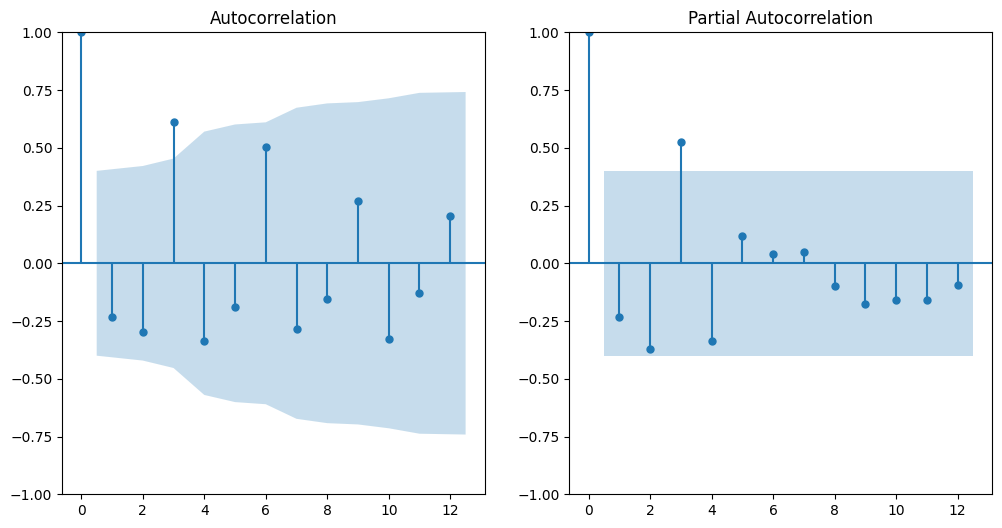

C:\Users\arora\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
C:\Users\arora\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
C:\Users\arora\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
C:\Users\arora\AppData\Local\Temp\ipykernel_7336\1955551637.py:39: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  forecast_index = pd.date_range(start=train_data.index[-1] + pd.Timedelta(hours=1),


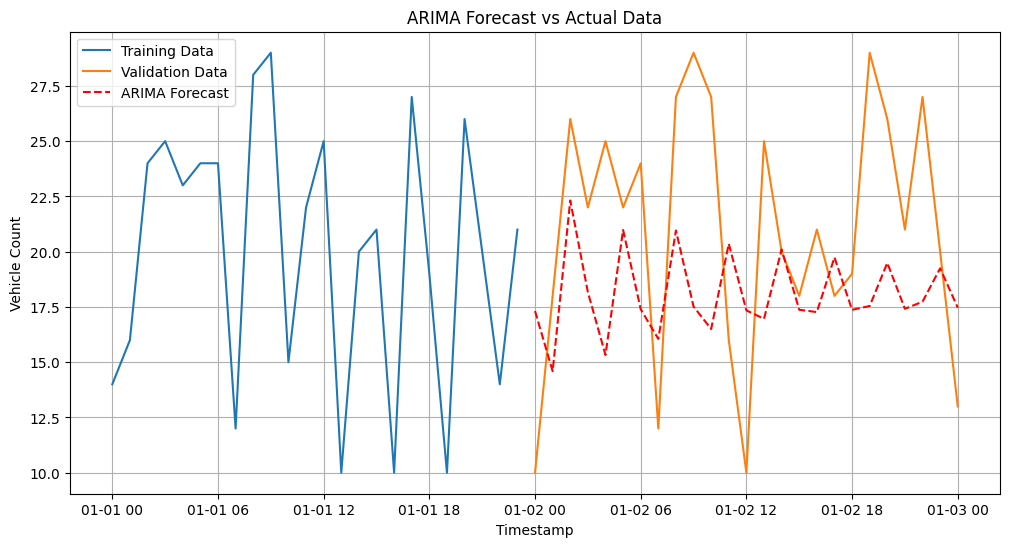

In [24]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller

# Assuming `train_data` and `val_data` are pre-loaded DataFrames
# Ensure index is a datetime type
train_data.index = pd.to_datetime(train_data.index)
val_data.index = pd.to_datetime(val_data.index)

# Check stationarity
result = adfuller(train_data['vehicle_count'])
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')

# Plot ACF and PACF
plt.figure(figsize=(12, 6))
plt.subplot(121)
plot_acf(train_data['vehicle_count'].dropna(), ax=plt.gca())
plt.subplot(122)
plot_pacf(train_data['vehicle_count'].dropna(), ax=plt.gca())
plt.show()

# Set ARIMA parameters (example values)
p, d, q = 5, 1, 0

# Train ARIMA model
model = ARIMA(train_data['vehicle_count'], order=(p, d, q))
model_fit = model.fit()

# Forecasting
forecast_steps = len(val_data)
forecast_results = model_fit.get_forecast(steps=forecast_steps)
forecast = forecast_results.predicted_mean
forecast_conf_int = forecast_results.conf_int()

# Generate forecast index
forecast_index = pd.date_range(start=train_data.index[-1] + pd.Timedelta(hours=1), 
                                periods=forecast_steps, freq='H')
forecast_series = pd.Series(forecast, index=forecast_index)

# Plot
plt.figure(figsize=(12,6))
plt.plot(train_data['vehicle_count'], label='Training Data')
plt.plot(val_data['vehicle_count'], label='Validation Data')
plt.plot(forecast_series, label='ARIMA Forecast', color='red', linestyle='--')

# Add titles and labels
plt.title('ARIMA Forecast vs Actual Data')
plt.xlabel('Timestamp')
plt.ylabel('Vehicle Count')
plt.legend()
plt.grid(True)

# Show plot
plt.show()


In [31]:
from keras.models import Sequential
from keras.layers import Input, LSTM, Dense

timesteps = 10  # Number of time steps in your input sequence
features = 5    # Number of features in each time step

model = Sequential()
model.add(Input(shape=(timesteps, features)))  # Define the input shape
model.add(LSTM(units=50, return_sequences=True))
model.add(LSTM(units=50))
model.add(Dense(1))

model.summary()


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                   │ (None, 10, 50)         │        11,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,451 (122.86 KB)

 Trainable params: 31,451 (122.86 KB)

 Non-trainable params: 0 (0.00 B)

In [34]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor

# Example data
X = np.random.rand(100, 5)  # 100 samples, 5 features
y = np.random.rand(100)     # 100 target values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the model
model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3)
model.fit(X_train, y_train)


GradientBoostingRegressor()

In [36]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}
grid_search = GridSearchCV(GradientBoostingRegressor(), param_grid, cv=3, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_
